# MSc in AI - CE6002 & CS5062

# Etivity 2 - Data preparation & Can we learn?

## Student Name: Mark Murnane
## Student ID: 18195326

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 - Missing Values

### Data Load

_Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values._ 

In order to fill in missing values we need to identify which attributes have missing values.  In E-tivity 1, only categorical columns had any missing data.  The first step is to load the data from *bank_et2.csv* and confirm that this still holds true.

In [2]:
df = pd.read_csv('bank_et2.csv', header=0, index_col=0)
print(f"Shape of the source data is {df.shape[0]} rows each with {df.shape[1]} columns\n")
df.describe(include=np.number)

Shape of the source data is 2000 rows each with 19 columns



,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [3]:
df.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


The `describe()` output confirms the same categorical attributes, and data missing from the _age_ attribute too. The following columns need to be addressed:

```
 - age        12 records
 - job        10 records
 - education  104 records
 - contact    191 records
 - poutcome   454 records
```


#### Notes

Age, job, education and contact are independent variables
poutcome likely is too, but confirm

### Fill in _age_

In [4]:
# Examine missing age records to determine what approaches are suitable, e.g. sample mean, sub-group mean, etc.
#age_df = df[df['age'].isnull()]
df[df['age'].isnull()].head(12)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


In [5]:
print(f"Average age across the entire sample is: {df['age'].mean()}\n")
df[df['age'].isnull()].describe(exclude=np.number)

Average age across the entire sample is: 41.753018108651915



,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,12,12,12,12,12,12,12,12,11,12
unique,8,2,3,2,2,2,2,5,2,2
top,self-employed,married,tertiary,no,yes,no,cellular,jan,failure,no
freq,3,8,7,11,6,10,11,6,8,9


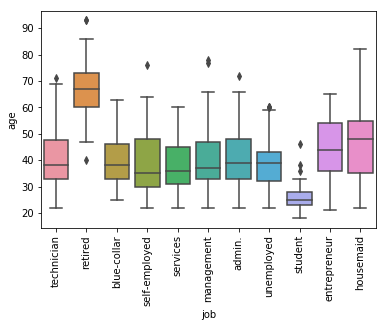

In [6]:
sns.boxplot(x='job', y='age', data=df)
plt.xticks(rotation='vertical')
plt.show()

The box plot tells us that the average age (41.75) is actually overstating the average by job type.  So instead of overall average, we'll fill in age average based on job type.  

As a predictor of financial capability, age is important as studies have shown that the years between the late 30s and early 40s can show a significant jump in earnings.

*TODO* Check if any other column would contradict this

In [7]:
# Fill in Age based on Median per job.  
avg_age = df.pivot_table(values=['age'], index=['job'], aggfunc=np.mean)

# Function that returns average age rounded.  
# TODO: Should it be floor?
def get_avg_age(x):
    return np.round(avg_age.loc[x['job'], 'age'])

df['age'].fillna(df[df['age'].isnull()].apply(get_avg_age, axis=1), inplace=True)

### Fill in _job_

In [8]:
# Jobs has only 0.5% of samples with missing data.
df[df['job'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,42.0,NaN,single,primary,no,2398,-1.418888,1.809977,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,46.0,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
831,41.0,NaN,single,primary,no,2398,-0.243804,-0.685437,yes,no,NaN,8,may,287,2,-1,0,NaN,no
1223,55.0,NaN,married,secondary,no,2206,-1.134511,0.861389,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,50.0,NaN,married,NaN,no,558,-0.455001,1.595412,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,54.0,NaN,married,secondary,no,2206,-0.575645,-0.242814,no,no,cellular,13,may,260,1,91,4,success,yes
1711,77.0,NaN,married,NaN,no,397,-0.871514,0.134782,no,no,telephone,7,may,300,3,-1,0,NaN,yes
1801,28.0,NaN,single,NaN,no,326,0.298961,1.653248,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,48.0,NaN,single,NaN,no,1819,0.680564,-0.786048,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,45.0,NaN,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


Half the values for Education are also NaN, so we can't use that as a factor to try and determine the job.  Likewise trying to predict education without knowing job is difficult.  From E-tivity 1 we know that balance has a similar distribution for all job types.

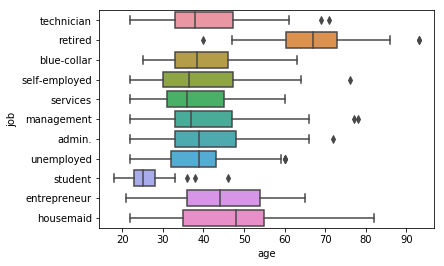

In [9]:
sns.boxplot(y='job', x='age', data=df)
plt.show()

Age alone is not a useful predictor.  We know from Etivity 1 that balance is not useful either.

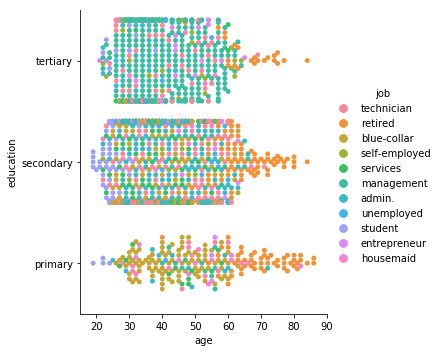

In [10]:
#sns.catplot(x="age", y="job", hue="education", kind="swarm", data=df)
sns.catplot(x="age", y="education", hue="job", kind="swarm", data=df)
plt.show()

The swarm plot illustrates that education and age do not clearly predict job type.  In the absence of education (half the samples) then it's nearly impossible to predict.  Imputing education would not help tie down job type either as there are a range of jobs across all ages.  

In [11]:
df.dropna(subset=['job'], inplace=True)

### Fill in _education_

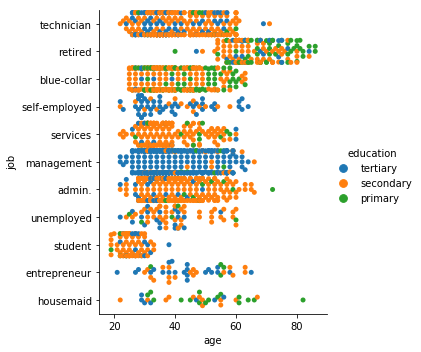

In [12]:
sns.catplot(x="age", y="job", hue="education", kind="swarm", data=df)
plt.show()

As noted above, job and education show quite a dependency.  The swarm plot shows that most people have a secondary education, and that for most jobs the secondary education is the norm, with exceptions of management, self-employed and housemaid.

In [13]:
#mode_education = df.pivot_table(values=['education'], index=['job'], aggfunc=mode)

# Can't get pivot_table with mode working quite correctly.
# This function provided by Seamus Brady in Forums / Q&A / Q&A E-tivity 2 / Populating data set with missing categorical attributes , open discussion
mode_education = pd.crosstab(df['education'], df['job']).idxmax()

def get_education_by_job(x):
    return mode_education.loc[x['job']]

df['education'].fillna(df[df['education'].isnull()].apply(get_education_by_job, axis=1), inplace=True)

### Fill in _contact_

The contact field records the mechanism in which clients were contacted for this campaign.  The overwhelming majority of cases are cellular, which reflects broader usage of mobile phones.  Age might play a factor in usage.

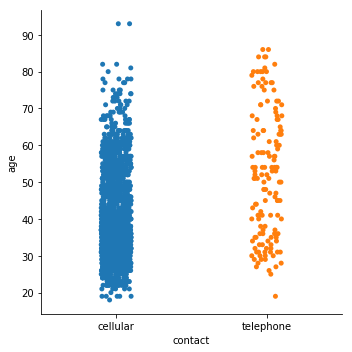

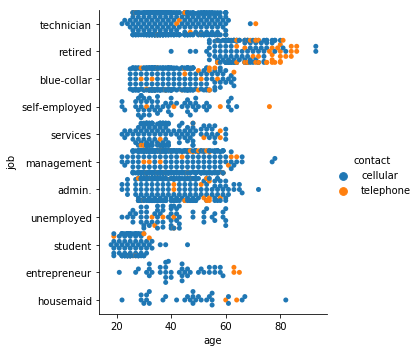

In [14]:
sns.catplot(x="contact", y="age", data=df)
sns.catplot(x="age", y="job", hue="contact", kind="swarm", data=df)

In [15]:
# Update all NaN contact to cellular
df['contact'].fillna('cellular', inplace=True)

### Fill in _poutcome_

In the definition of the data set, the _poutcome_ value is the success (subscribed) value of the previous marketing campaign.
This should be a binary value (failure/success) but there is an other value.  While this could be a potential predictor (past returns are a guide to future gains?) the best option for now might be to create a new category of unknown.  There is not yet enough data to impute any of the existing values.

In [16]:
# Check the existing values
df['poutcome'].fillna('unknown', inplace=True)

### DataFrame description after Missing Values updates

In [17]:
df.describe(include=np.number)

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,41.714070,1414.038191,0.246348,0.484151,13.883417,291.302513,1.912060,167.782915,2.564322
std,12.698743,3138.455806,0.819399,1.075702,9.722571,220.505890,1.381049,131.189454,3.405794
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,199.000000,-0.304435,-0.276613,5.000000,146.000000,1.000000,76.250000,1.000000
50%,38.000000,549.000000,0.225843,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1634.750000,0.811116,1.210057,23.000000,375.750000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [18]:
df.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990
unique,11,3,3,2,2,2,2,12,4,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1105,1066,1975,1029,1740,1845,402,951,997


### Task 1 Decision Summary

The following decisions were made for dealing with missing values in the data set:

 - For age, the value was imputed using the average age per job category.  The sample average is higher than for most job categories due to the ranges for retired and student.

 - The missing job values were removed.  No single column is a useful predictor of job and age and education could be of value but there are missing education values too.  The sample size reduction is 0.5%.

 - Education is dominated by secondary level, but for management and housemaid there is a clear difference.  Filled in missing education values by mode of education per job type.

 - The contact column is a record of how customers were contacted.  Possibly not predictive in itself so filled all values as cellular, the most common value (and by age, job).

 - The poutcome field list the success of the previous campaign.  This could be a predictor, or at least an informative column.  Filled in the missing values with a new category of ‘unkown’.  The existing value of ‘other’ is ambiguous.  It could mean contact was barred!


## Task 2 - Outliers

For the handling of outliers, the focus is on the ordinal attributes of the data set.  

It's inherently hard to identify categorical outliers, but in the output from `describe()` above we can see that categorical values are all legitimate (e.g. job, education, binary attributes).  The distribution of the values (as seen numerically and graphically in E-tivity 1) does not suggest any outlier issues (e.g. all but 1 of the customers being married).


### Ordinal Outliers

To identify the presence of outliers, a histogram of the individual values is a clear starting point.

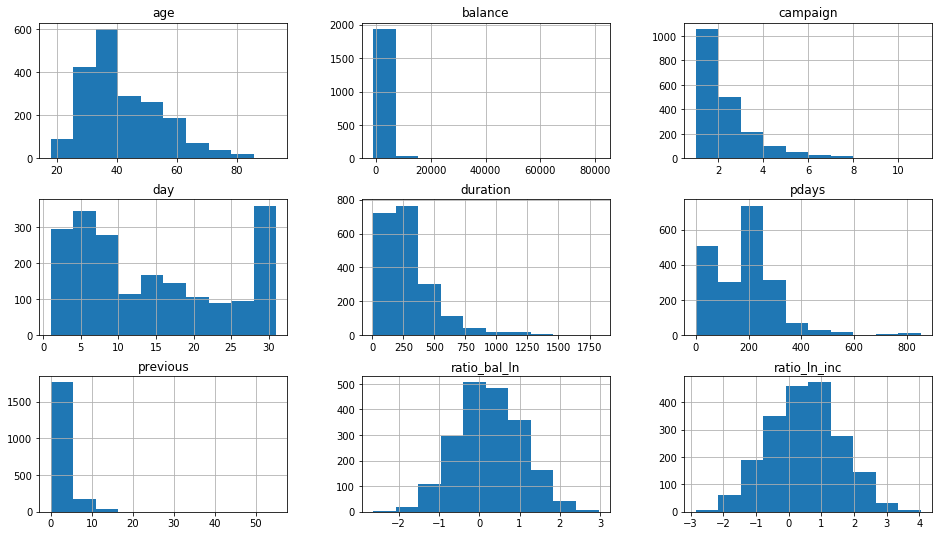

In [19]:
ax = df.hist(figsize=(16,9))
plt.show()

For most columns there does not appear to be any invalid data indicated by the histogram:

 - The range _age_  is possible with no negative or implausible values
 - The counter attributes such as _campaign, duration, pdays, previous_ are all positive
 - The _ratio_ attributes are normally distributed
 
 The _balance_ attribute clearly has some outliers values that are skewing the mean heavily (as noted previously in E-tivity 1).
 To examine the outlier values more it's worth checking in more detail with a box plot.

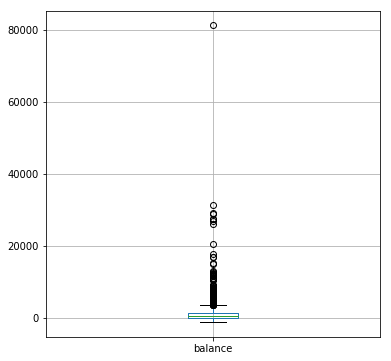

In [20]:
df.boxplot(['balance'], figsize=(6,6))
plt.show()

The plot shows that the extreme values is limited to a single customer with a balance of > 80,000.  There are are however, many other outliers with a lower value.

In [21]:
# Calculate the interquartile range
balance_q3 = df['balance'].quantile(0.75)
balance_q1 = df['balance'].quantile(0.25)
balance_iqr = 1.5*(balance_q3 - balance_q1)

# Count how many outlier values exist
outliers_high = sum(df['balance'] > (balance_q3 + balance_iqr))
outliers_low  = sum(df['balance'] < (balance_q1 - balance_iqr))

print(f"The maximum value of balance is {df['balance'].max()}")
print(f"The minimum value of balance is {df['balance'].min()}\n")
print(f"There are {outliers_high} outliers above the whiskers")
print(f"There are {outliers_low} outliers below the whiskers")

The maximum value of balance is 81204
The minimum value of balance is -980

There are 159 outliers above the whiskers
There are 0 outliers below the whiskers


Two approaches can be used:

 - Remove outliers
 - Transform the outliers using something like log transformation
 
As a general rule, outliers should be removed only if they are/might represent an error in sampling.  Another consideration might be if the outliers are few and might otherwise skew a training model.

As there are a large number of outliers, a log transformation is an appropriate way to deal with them.

The log transformed values will be stored in a new column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001934CF500F0>]],
      dtype=object)

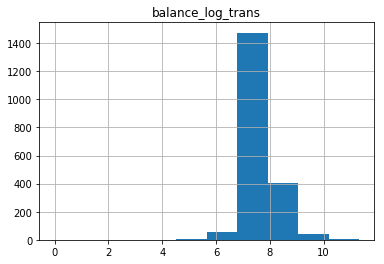

In [22]:
# Need to handle 0 values to avoid divide-by-zero errors
# Need to handle negative values
# Use a constant to move these values.  As the minimum balance is -980, then adding 981 is viable
# Suggestion from https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html
df['balance_log_trans'] = df.apply(lambda row: np.log(row['balance'] + 981), axis=1)

df.hist(['balance_log_trans'])

This gives a more normally distributed view of balance, and removes issues with the order of magnitude differences in values.

### Task 2 Decision Summary

The following decisions were made in relation to outlier handling:

 - Categorical variables were excluded.  Summary data from the DataFrame and visualisation in E-tivity 1 does not suggest of the attributes have either an outlier value or an heavily skewed distribution of values.
 
 - Kept the extreme balance value of 81,204 as its probably accurate and may be of interest for the business case.
 - Applied a log transformation to the _balance_ values, and used a constant to ensure all values were positive with no 0 values prior to transformation. 
 - In the absence of other information, the _ratio_ attributes are assumed to be derived, so the outliers may come from another feature.

## Task 3 - Feature Engineering

For a new feature, I'd suggest a feature that describes if this customer is a "High Net Worth" individual.  This could be a composite of a couple of features:

 - _balance_ to suggest if they have money to invest
 - _housing_ and _loan_ data to indicate liabilities
 - _job_ and _education_ columns to hint at income capacity?
 
 
 In terms of the 2-class classification for the _subscribed_ column, such a feature could be used to predict the effectiveness of the campaign on individuals who are desirable from a credit risk perspective.